# test-3

From big test comaprison table with 10 plots.

LogCircular 1:10 - point GO

19 dic 2024

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def make_plots(file_name,reference_file_name=None):
  data = pd.read_csv(file_name)
  pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
  print(data)

  if reference_file_name is not None:
    reference_data = pd.read_csv(reference_file_name)

  plt.figure(figsize=(13, 6))  # Adjust the figure size for two plots

  plt.subplot(1, 2, 1)  # Second subplot (bottom)
  plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='Exact Error')
  plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='Estimated Error')
  if reference_file_name is not None:
    plt.loglog(reference_data['DoFs'], reference_data['ex POINT err'],"b:+", linewidth=0.5, label='GlobRef exact error (Reference)')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.ylabel('Error', fontsize=12)
  plt.title('Exact vs Estimated POINT error', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  plt.subplot(1, 2, 2)  # First subplot (top)
  plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
  plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.title('Exact error and residual', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  # Adjust layout and show the plots
  plt.tight_layout()
  plt.show()

## Old mesh, already too fine

### config-2

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0   7584   7742 3.5674313951e+00 2.9288584660e-02 9.0638885160e+02   
1      1  11535  11931 1.0155633079e+00 1.4522620770e-02 6.6968378156e+02   
2      2  23913  24864 3.2732014337e-01 6.5140158999e-03 4.7731501633e+02   
3      3  56373  58050 5.7056539290e-02 4.2679951685e-03 3.3662486719e+02   

      std FLUX err          est err   Cons. FLUX err  
0 4.5994602189e+03 4.7055657839e+00 4.1031247000e+01  
1 2.3962532882e+03 1.8873780109e+00 2.4720842000e+01  
2 1.6447074090e+03 8.0409351489e-01 4.4373750000e+00  
3 1.0413606659e+03 3.1162996494e-01 1.4335660000e+01  


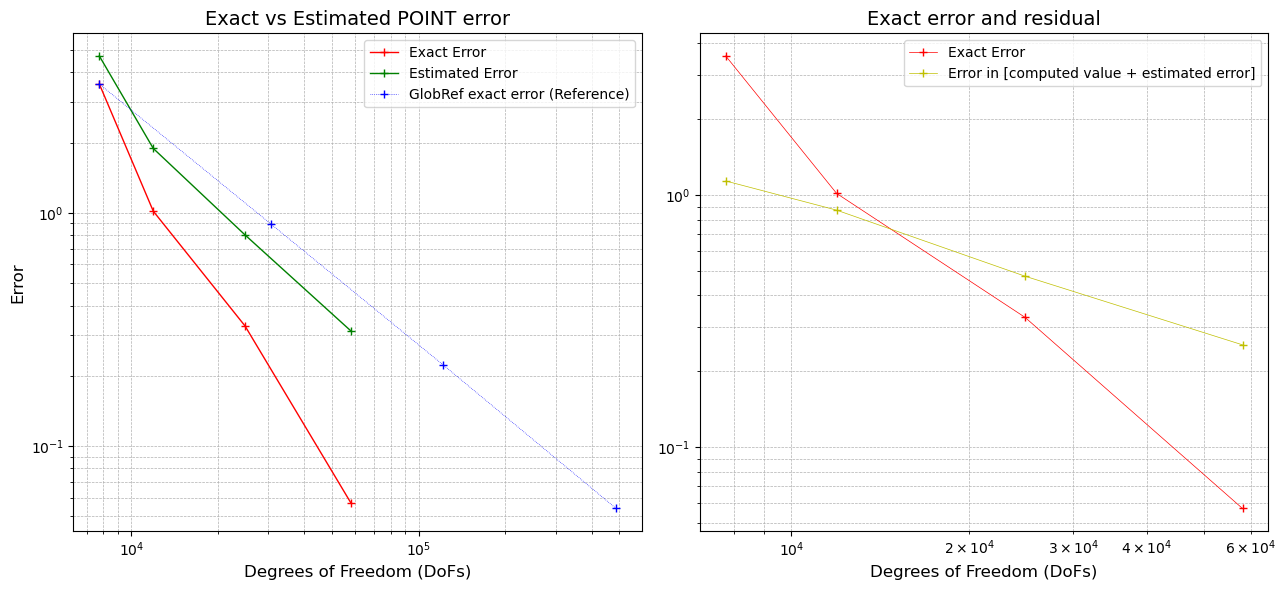

In [3]:
make_plots("./results/config-2/convergence_results.csv","./results/config-1/convergence_results.csv")

## MeshB - all manifolds

### config-4 

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0    532    570 5.0396042654e+00 8.4781713549e-02 2.2412535305e+03   
1      1   1033   1112 4.5485837183e+00 7.6593611562e-02 1.9724178447e+03   
2      2   2386   2543 1.8848412715e+00 6.4265113215e-02 1.3971939546e+03   
3      3   5785   6107 3.1912283098e-01 4.3910633258e-02 1.0516733867e+03   
4      4  14449  15244 5.0210812974e-01 1.2434072235e-02 6.1906052664e+02   
5      5  33199  34572 1.1444746096e-01 8.0363548166e-03 4.2762558168e+02   
6      6  80074  82842 5.6330175625e-02 3.4909843562e-03 2.8060453056e+02   

      std FLUX err          est err   Cons. FLUX err  
0 5.2030347257e+03 2.2239424252e+01 2.5111588900e+02  
1 4.3353927194e+03 1.2659154626e+01 1.5358143300e+02  
2 2.7258708154e+03 5.6267655240e+00 1.1117551500e+02  
3 2.4903281204e+03 2.1973371852e+00 1.2636835000e+01  
4 1.5048781124e+03 1.1455707670e+00 2.8720086000e+01  
5 8.8701720673e+02 4.5784252680e-01 6.7574940000e+00 

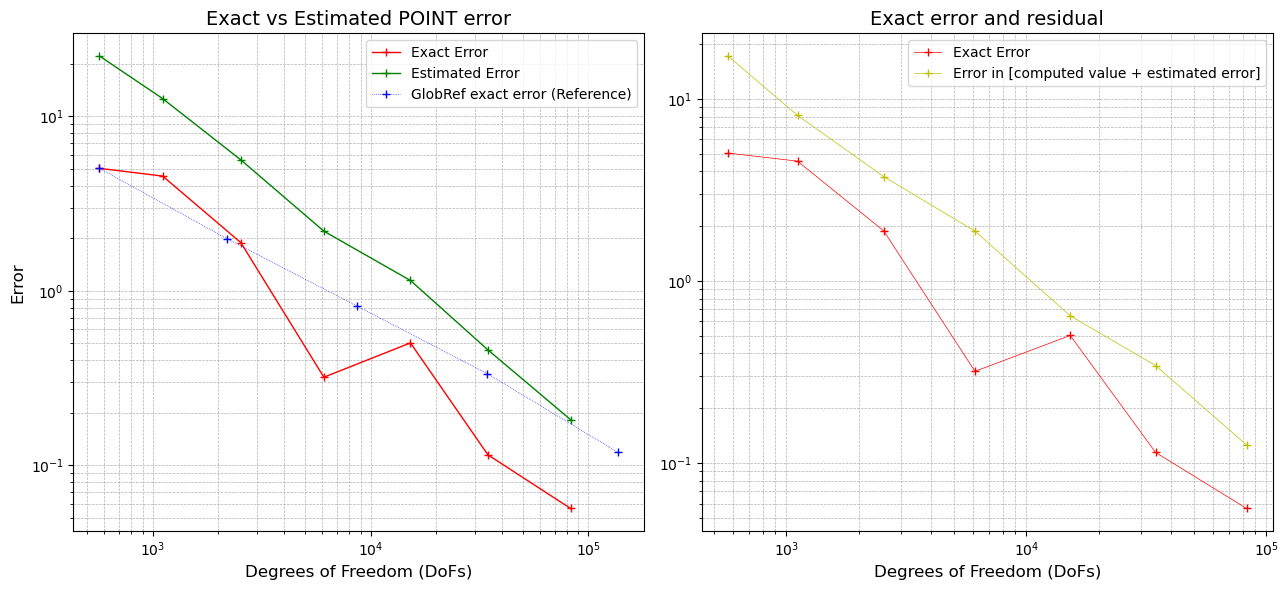

In [4]:
make_plots("./results/config-4/convergence_results.csv","./results/config-3/convergence_results.csv")

## Add iso-geometric elements

### config-6

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0     532     570 5.3177609259e+00 1.4272476078e-01 1.5887611408e+03   
1      1     982    1065 5.7152712432e+00 1.2050120024e-01 1.4349648407e+03   
2      2    2176    2317 4.1359859064e+00 8.9715991041e-02 1.1588167646e+03   
3      3    5302    5584 1.9782665509e+00 5.0314870067e-02 8.3705490586e+02   
4      4   13525   14266 1.0413057339e+00 1.6922640886e-02 5.4595916356e+02   
5      5   33175   34476 3.9899952832e-01 9.7694022534e-03 3.9046729619e+02   
6      6   84859   87293 1.5213743850e-01 3.2156626044e-03 2.4943481718e+02   
7      7  211033  217193 7.2115988155e-02 1.1299711575e-03 1.5496886222e+02   
8      8  492106  501068 2.7544880770e-02 7.7939846900e-04 1.0871431164e+02   

      std FLUX err          est err   Cons. FLUX err  
0 5.3155086825e+03 2.6221007608e+00 1.2616276700e+02  
1 4.2945260070e+03 4.0703952972e+00 5.6727510000e+01  
2 3.2360024676e+03 3.3507714482e+00 2.710250

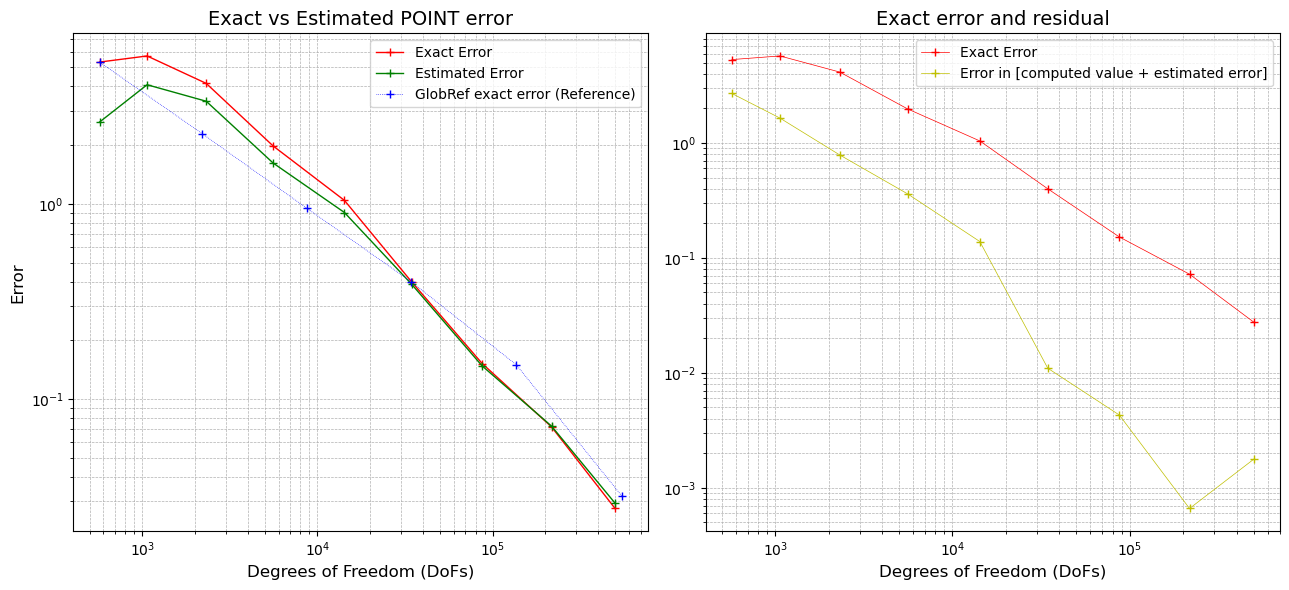

In [8]:
make_plots("./results/config-6/convergence_results.csv","./results/config-5/convergence_results.csv")